### Alternatives to the Markowitz Portfolio Problem

In [38]:
import sys
import numpy as np
import itertools
import  matplotlib.pyplot as plt
path='/home/jbohn/jupyter/personal/L1_Portfolio_Opt/'
sys.path.append(path)

from Features.features import load_features
from Split_Bregman.split_bregman_opt import split_bregman
from Split_Bregman.grid_search import grid_search
from Parameter_Estimation.bias_cov import reg_cov
from Parameter_Estimation.bias_mean import reg_mean


### Prep Data and Features

In [2]:
train_test_split=0.5
train_data, test_data = load_features(train_test_split)
train_data

,MMM,AOS,ABT,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WHR,WMB,WTW,GWW,WYNN,XEL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.628321,-1.285971,-0.811210,-2.432083,0.616121,0.176830,0.538743,1.631272,-0.538452,-0.596131,...,-0.207657,1.241682,-0.224387,0.041128,5.904149,-1.193047,-0.342566,-0.174548,3.116535,3.465148
2010-01-06,1.408218,0.045393,0.553813,-1.535767,1.057458,-0.531440,-0.253164,-0.212432,-0.235015,0.868174,...,-0.884311,3.193428,1.597067,0.379627,-1.320395,0.191851,-0.717461,-0.771667,-0.032304,8.338160
2010-01-07,0.071691,0.294622,0.825011,0.000000,-0.093539,-2.427090,-1.051132,-1.959530,-0.047069,-0.024706,...,2.123851,-0.710789,-0.295205,0.937728,2.113119,-0.432174,-0.028805,-2.531778,2.268103,10.616021
2010-01-08,0.702170,1.460205,0.509927,-2.044570,-0.398552,-0.822299,-1.256660,-0.543629,-0.141351,0.394477,...,2.103321,0.799284,-0.110934,1.169962,-0.719055,0.048113,0.028805,-0.325557,-2.122811,-1.631952
2010-01-11,-0.404037,-0.469430,0.507340,-1.839410,-0.094009,-0.091779,0.064831,-1.316890,0.446902,-0.989122,...,-0.640649,-0.621110,0.993936,0.420251,-0.324534,0.957398,1.713344,0.325557,2.185967,0.607538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,0.053927,0.303000,-0.043755,0.338579,-0.109443,0.591430,-0.112905,0.482834,0.082154,-0.597355,...,0.010458,-0.834438,-0.088298,-0.318574,-0.522166,2.232856,0.151239,0.319673,0.562442,-0.035058
2014-12-26,-0.420151,0.762348,0.327685,0.466928,-0.065722,0.343389,0.581993,-0.093701,-0.046938,-0.143644,...,0.677794,0.615528,-0.044178,0.042790,-0.351843,0.961420,0.479675,-0.294066,0.052565,0.140151
2014-12-29,0.270302,0.088268,-0.546748,-0.414938,-0.814182,-0.294259,-0.544341,-0.725811,-0.388069,0.759608,...,0.300925,0.021909,-0.331971,0.686111,1.733903,1.815025,0.572598,-0.064035,-0.588570,0.558660


In [21]:
cov=np.cov(train_data.T)
mean=np.mean(train_data,axis=0).values

biased_cov=reg_cov(train_data)
biased_mean=reg_mean(train_data,train_data.shape[0])


Solved via QP
- Minimum Variance Objective
- Mean Variance Objective
- Mean Variance Objective with Biased Estimators

Solved via Split Bregman
- Mean Variance Objective with Elastic Net Penalty
- Mean Variance Objective with Biased Estimators and Elastic Net Penalty

Solutions to each are for cross-validated optimal parameters for $\lambda_1$ and $\lambda_2$

Unit Box constraints allowing for shorts (-1,1)

In [27]:
lb,ub=-1,1
cutoff_threshold=0.01

lambda1_grid=np.geomspace(10e-6,1,5)
lambda2_grid=np.geomspace(10e-6,1,5)

# take all possible combinations of lambda1 and lambda2
params=[]
for i in itertools.product(lambda1_grid,lambda2_grid):
    params.append(i)

### Minimum Variance with Unbiased Sample Estimates

- $\lambda_1=\lambda_2=0$
- $\mu$=0

In [28]:
lambda1,lambda2=0,0
zero_mean=np.zeros(len(mean))
w_variance,w_variance_err,status_var=split_bregman(cov=cov,mean=zero_mean,lambda1=lambda1,lambda2=lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)
w_variance

Total Cost: 0.09828983037933266
Total Cost: 0.0982898303793326
Total Cost: 0.09828983037933264
Total Cost: 0.09828983037933259
Total Cost: 0.09828983037933245
Total Cost: 0.09828983037933249
Total Cost: 0.09828983037933267
Total Cost: 0.09828983037933268
Total Cost: 0.0982898303793325
Total Cost: 0.09828983037933263
Total Cost: 0.09828983037933256
Total Cost: 0.0982898303793326
Total Cost: 0.09828983037933268
Total Cost: 0.09828983037933273
Total Cost: 0.09828983037933266
Total Cost: 0.09828983037933249
Total Cost: 0.09828983037933271
Total Cost: 0.0982898303793327
Total Cost: 0.09828983037933264
Total Cost: 0.0982898303793326
Total Cost: 0.09828983037933257
Total Cost: 0.09828983037933267
Total Cost: 0.09828983037933278
Total Cost: 0.09828983037933242
Total Cost: 0.09828983037933246
Total Cost: 0.09828983037933242
MaxIter Achieved


array([ 1.18325245e-03,  4.99204167e-03, -1.74145428e-02, -2.87951998e-03,
       -5.90006771e-03, -5.53536843e-03, -2.03393336e-02,  1.66640330e-02,
       -3.77759945e-02,  7.18607513e-04, -1.95927794e-02, -1.42380650e-02,
       -5.50296680e-02,  7.97545324e-03, -7.18903530e-03, -2.28322029e-02,
        8.24149070e-03, -1.43478716e-02, -2.37786248e-03, -7.46514132e-02,
        1.47781868e-02, -2.36351514e-01,  2.47183075e-01, -3.43984496e-03,
        4.50919758e-03,  2.27797769e-03, -1.48211278e-02, -3.80195920e-03,
       -5.56960715e-02, -1.93728072e-02,  7.85322150e-04, -4.55347732e-02,
        3.45409958e-02, -2.63163838e-02,  3.20911170e-02, -1.93794464e-02,
       -4.24439094e-02, -3.27458286e-02, -2.47593051e-02,  3.56985913e-02,
        7.29048811e-03, -2.67825601e-03,  4.72365529e-03,  1.68405473e-02,
        6.80059456e-02,  1.79649053e-02,  2.11169803e-02,  3.81569164e-02,
       -1.22486650e-02, -9.87112902e-03,  3.62363687e-02,  2.47393282e-02,
        9.06233243e-03,  

Text(0, 0.5, 'Weight')

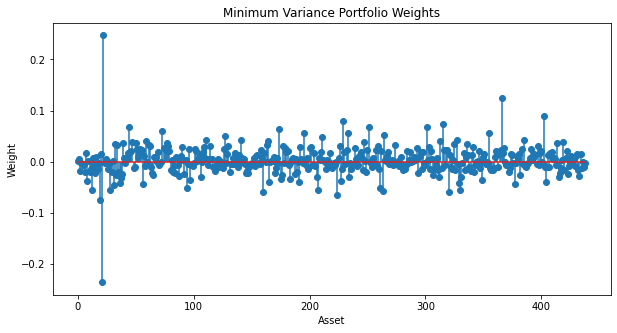

In [41]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Minimum Variance Portfolio Weights")
ax.stem(w_variance)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Mean Variance with Unbiased Sample Estimates

-$\lambda_1=\lambda_2=0$

In [29]:
lambda1,lambda2=0,0
w_mean_variance,w_mean_variance_err,status=split_bregman(cov=cov,mean=mean,lambda1=lambda1,lambda2=lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)
w_mean_variance

Total Cost: 0.08320742631914169
Total Cost: 0.08320742632423261
Total Cost: 0.08320742632423306
Total Cost: 0.08320742632423406
Total Cost: 0.08320742632423361
Total Cost: 0.08320742632423256
Total Cost: 0.08320742632423345
Total Cost: 0.0832074263242335
Total Cost: 0.08320742632423306
Total Cost: 0.08320742632423328
Total Cost: 0.08320742632423295
Total Cost: 0.08320742632423334
Total Cost: 0.08320742632423406
Total Cost: 0.08320742632423306
Total Cost: 0.08320742632423317
Total Cost: 0.083207426324233
Total Cost: 0.08320742632423328
Total Cost: 0.08320742632423311
Total Cost: 0.08320742632423356
Total Cost: 0.08320742632423339
Total Cost: 0.08320742632423295
Total Cost: 0.08320742632423306
Total Cost: 0.083207426324233
Total Cost: 0.08320742632423367
Total Cost: 0.08320742632423378
Total Cost: 0.08320742632423345
MaxIter Achieved


array([ 5.40500011e-02,  5.72474149e-02, -5.62765616e-02, -3.77999480e-03,
       -3.24392058e-03, -2.57225603e-02, -5.05481630e-02,  2.64215331e-03,
        2.59757841e-02,  3.27362951e-03, -6.40288132e-02, -2.72291782e-02,
       -6.44158907e-02,  3.87105384e-02, -8.35324527e-03, -6.15658638e-03,
       -1.53430837e-02, -6.28515585e-02, -1.90249748e-02, -6.47634282e-02,
        6.57025250e-02, -2.21799600e-01,  1.84346394e-01, -2.51049260e-03,
       -1.91855798e-02, -2.85864748e-02, -6.59352940e-02,  8.22072430e-03,
        8.35528661e-03, -5.66488422e-02, -5.62606228e-03, -4.88210304e-02,
        4.46151004e-02,  2.81706681e-02,  4.10515744e-02, -3.84625212e-03,
       -5.40842129e-02, -2.41094050e-02, -4.51510307e-02,  1.51849687e-02,
        4.94615070e-02, -1.58272512e-02,  5.19897999e-02, -2.05203615e-02,
        1.35514041e-01, -3.93936952e-02,  2.93078758e-02,  9.89662742e-02,
       -5.05826317e-02, -3.56842098e-02,  3.72028611e-02,  3.36816398e-02,
       -3.07728065e-03,  

Text(0, 0.5, 'Weight')

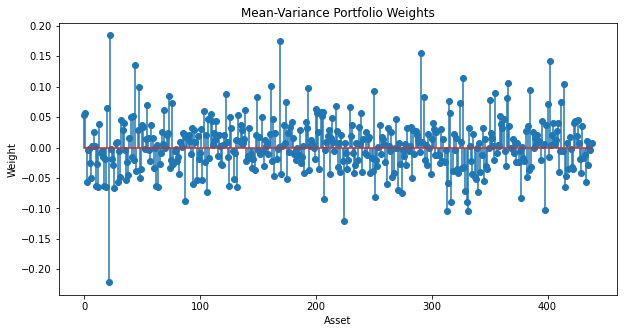

In [42]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Mean-Variance Portfolio Weights")
ax.stem(w_mean_variance)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Mean Variance with Biased Estimators 

-$\lambda_1=\lambda_2=0$

- $\mu \rightarrow{} \hat{\mu}$
- $\Sigma\rightarrow{} \rho \hat{\Sigma}+(1-\rho)I$

In [30]:
lambda1,lambda2=0,0
w_mean_variance_bias,w_mean_variance_bias_err,status_mv_bias=split_bregman(cov=biased_cov,mean=biased_mean,lambda1=lambda1,lambda2=lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)
w_mean_variance_bias

Total Cost: 0.0704056468279852
Total Cost: 0.07040564682819692
Total Cost: 0.07040564682819692
Total Cost: 0.07040564682819686
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819686
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819683
Total Cost: 0.07040564682819692
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819694
Total Cost: 0.07040564682819692
Total Cost: 0.07040564682819683
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819692
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819692
Total Cost: 0.07040564682819686
Total Cost: 0.07040564682819689
Total Cost: 0.07040564682819683
Total Cost: 0.07040564682819686
MaxIter Achieved


array([ 1.12721086e-02,  1.28644493e-02,  5.37540939e-03,  4.10010468e-04,
        7.00844407e-03,  2.48321859e-03, -8.14744025e-03, -3.01678327e-03,
        9.67479195e-03,  1.19878236e-02, -2.38713406e-02, -1.61175286e-02,
       -1.15817396e-02,  1.16325849e-03, -1.94829664e-03,  6.62575763e-03,
       -1.10498610e-02, -1.66339998e-02, -2.79247833e-04,  6.92688460e-03,
        1.24040948e-02, -3.04988358e-03, -3.14837664e-03,  3.55618369e-02,
       -4.63208674e-03, -1.70077145e-02, -3.64192006e-03,  3.98839608e-03,
        8.71372855e-03, -5.17401360e-03, -4.99597605e-03,  8.26085244e-05,
        2.43942437e-02,  5.34402926e-04,  2.53820021e-02,  4.85110091e-03,
       -2.08947322e-04, -1.34824656e-03, -1.32660306e-03, -3.07982298e-03,
        1.16470369e-02, -1.54345426e-02,  2.65384292e-02, -1.51699561e-03,
        4.03332014e-02,  5.67830944e-03,  8.78482215e-03, -1.67654625e-03,
        6.77581157e-05, -6.28240973e-03,  5.23533003e-02,  7.17163109e-03,
       -8.86080729e-03, -

Text(0, 0.5, 'Weight')

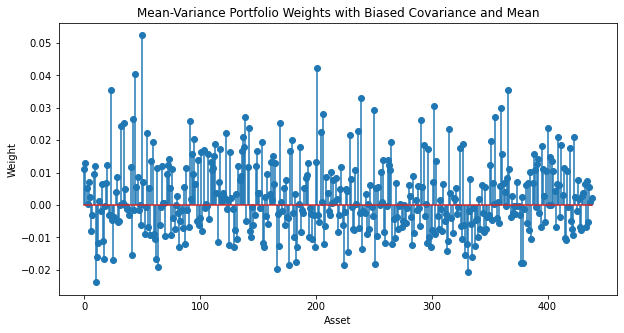

In [43]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Mean-Variance Portfolio Weights with Biased Covariance and Mean")
ax.stem(w_mean_variance_bias)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Elastic Net Penalty Unbiased Sample Estimates 

In [31]:
sorted_dict=grid_search(params,mean,cov,tol=10e-6,maxiter=25)
optimal_lambda1,optimal_lambda2=sorted_dict[0][0]

 lambda1: 1e-05 lambda2: 1e-05 error: 0.083284
 lambda1: 1e-05 lambda2: 0.00017783 error: 0.08339463
 lambda1: 1e-05 lambda2: 0.00316228 error: 0.085598
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 0.05623413251903491
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 1.0
 lambda1: 0.00017783 lambda2: 1e-05 error: 0.08445957
 lambda1: 0.00017783 lambda2: 0.00017783 error: 0.08456844
 lambda1: 0.00017783 lambda2: 0.00316228 error: 0.08675899
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 0.05623413251903491
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 1.0
 lambda1: 0.00316228 lambda2: 1e-05 error: 0.10536438
 lambda1: 0.00316228 lambda2: 0.00017783 error: 0.10544206
 lambda1: 0.00316228 lambda2: 0.00316228 error: 0.10740448
QP Optimization f

In [32]:
print(f" Optimal lambda1: {optimal_lambda1} Optimal lambda2: {optimal_lambda2} with error: {sorted_dict[0][1][1]}")
w_sb_unbias,w_sb_unbias_err,status_sb_unbias=split_bregman(cov=cov,mean=mean,lambda1=optimal_lambda1,lambda2=optimal_lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)

 Optimal lambda1: 1e-05 Optimal lambda2: 1e-05 with error: 0.0832840033236691
Total Cost: 0.08328162684358442
Total Cost: 0.08328172164438129
Total Cost: 0.0832818164621063
Total Cost: 0.08328191130184183
Total Cost: 0.083282006163579
Total Cost: 0.08328210104730611
Total Cost: 0.08328219595301395
Total Cost: 0.08328229088069079
Total Cost: 0.08328238583032613
Total Cost: 0.08328248080191093
Total Cost: 0.08328257579543252
Total Cost: 0.08328267081088123
Total Cost: 0.08328276584824784
Total Cost: 0.08328286090752066
Total Cost: 0.08328295598868864
Total Cost: 0.08328305109174151
Total Cost: 0.08328314621667018
Total Cost: 0.08328324136346327
Total Cost: 0.08328333653210958
Total Cost: 0.08328343172259982
Total Cost: 0.0832835269349223
Total Cost: 0.08328362216906876
Total Cost: 0.08328371742502641
Total Cost: 0.08328381270278608
Total Cost: 0.08328390800233713
Total Cost: 0.08328400332366954
MaxIter Achieved


Text(0, 0.5, 'Weight')

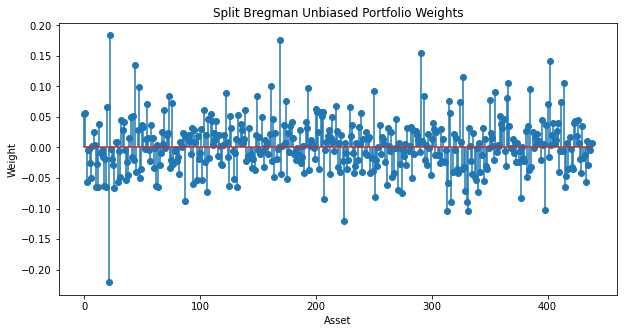

In [44]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Split Bregman Unbiased Portfolio Weights")
ax.stem(w_sb_unbias)

ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

In [48]:
np.sum(abs(w_sb_unbias))

14.009154238676908

### Elastic Net Penalty with Biased Estimates

In [33]:
bias_sorted_dict=grid_search(params,biased_mean,biased_cov,tol=10e-6,maxiter=25)
optimal_bias_lambda1,optimal_bias_lambda2=bias_sorted_dict[0][0]

 lambda1: 1e-05 lambda2: 1e-05 error: 0.07042509
 lambda1: 1e-05 lambda2: 0.00017783 error: 0.07043155
 lambda1: 1e-05 lambda2: 0.00316228 error: 0.0705467
 lambda1: 1e-05 lambda2: 0.05623413 error: 0.07269067
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 1.0
 lambda1: 0.00017783 lambda2: 1e-05 error: 0.07074496
 lambda1: 0.00017783 lambda2: 0.00017783 error: 0.07075143
 lambda1: 0.00017783 lambda2: 0.00316228 error: 0.07086663
 lambda1: 0.00017783 lambda2: 0.05623413 error: 0.07301176
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 1.0
 lambda1: 0.00316228 lambda2: 1e-05 error: 0.07643318
 lambda1: 0.00316228 lambda2: 0.00017783 error: 0.0764397
 lambda1: 0.00316228 lambda2: 0.00316228 error: 0.07655598
 lambda1: 0.00316228 lambda2: 0.05623413 error: 0.0787218
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.0031622776601683794

In [34]:
print(f" Optimal lambda1: {optimal_bias_lambda1} Optimal lambda2: {optimal_bias_lambda2} with error: {bias_sorted_dict[0][1][1]}")
w_sb_bias,w_sb_bias_err,status_sb_bias=split_bregman(cov=biased_cov,mean=biased_mean,lambda1=optimal_bias_lambda1,lambda2=optimal_bias_lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)

 Optimal lambda1: 1e-05 Optimal lambda2: 1e-05 with error: 0.07042509116883856
Total Cost: 0.07042499535814549
Total Cost: 0.07042499919070555
Total Cost: 0.07042500302305839
Total Cost: 0.07042500685541729
Total Cost: 0.07042501068778223
Total Cost: 0.07042501452015307
Total Cost: 0.07042501835253019
Total Cost: 0.0704250221849131
Total Cost: 0.07042502601730216
Total Cost: 0.07042502984969726
Total Cost: 0.07042503368209836
Total Cost: 0.07042503751450559
Total Cost: 0.07042504134691874
Total Cost: 0.07042504517933781
Total Cost: 0.07042504901176312
Total Cost: 0.07042505284419437
Total Cost: 0.07042505667663165
Total Cost: 0.07042506050907489
Total Cost: 0.0704250643415243
Total Cost: 0.07042506817397964
Total Cost: 0.07042507200644106
Total Cost: 0.07042507583890856
Total Cost: 0.07042507967138201
Total Cost: 0.0704250835038615
Total Cost: 0.07042508733634706
Total Cost: 0.07042509116883867
MaxIter Achieved


Text(0, 0.5, 'Weight')

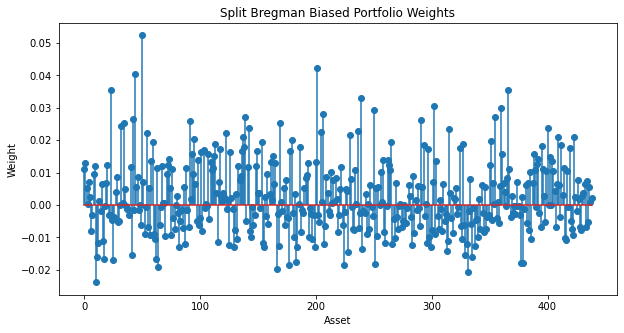

In [45]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Split Bregman Biased Portfolio Weights")
ax.stem(w_sb_bias)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")


In [ ]:
cum_returns_split_i=np.cumprod(1+np.dot(w2,returns_test.T))
cum_returns_split_j=np.cumprod(1+np.dot(wi,returns_test.T))
cum_returns_split_opt=np.cumprod(1+np.dot(w_opt,returns_test.T))


equal=(1/returns_test.shape[1])*np.ones(returns_test.shape[1])
cum_returns_equal=np.cumprod(1+np.dot(equal,returns_test.T))
fig,ax=plt.subplots(figsize=(10,8))
plt.title("Out of Sample Performance")
plt.plot(pd.to_datetime(returns_test.index),cum_returns_split_i,label='Split Bregamn Sparse',color='red')
plt.plot(pd.to_datetime(returns_test.index),cum_returns_split_j,label='Split Bregamn Optimal',color='green')
plt.plot(pd.to_datetime(returns_test.index),cum_returns_equal,label='Equal Weighted',color='blue')
plt.plot(pd.to_datetime(returns_test.index),cum_returns_split_opt,label='Markowitz Mean Variance',color='purple')
plt.xlabel(f"{len(wi[nonzero_wi])} Nonzero components")
plt.ylabel("Cumulative Return")
plt.legend()

In [ ]:
def get_sharpe(port_returns,rf=0.0178):
    sd=np.std(port_returns)*np.sqrt(252)
    mu=np.mean(port_returns)*252
    
    sharpe=(mu-rf)/sd
    
    return sharpe

In [ ]:
print(f"Sharpe of equal allocation is {round(get_sharpe(np.dot(equal,returns_test.T)),2)}")
print(f"Sharpe of Mean Variance allocation is {round(get_sharpe(np.dot(w_opt,returns_test.T)),2)}")
print(f"Sharpe of Split-Bregman Optimal allocation is {round(get_sharpe(np.dot(wi,returns_test.T)),2)}")
print(f"Sharpe of Split-Bregman Sparse allocation is {round(get_sharpe(np.dot(w1,returns_test.T)),2)}")